# **1. Métricas de desempeño - modelos (Sin reducción de la dimensionalidad)**
---

Probaremos diversos modelos de clasificiación debido a que tenemos una variable a predecir que es: una persona tendrá ataque cardiaco o no (HadHeartAttack)

### 1.1 modelo : LOGISTIC REGRESION


In [ ]:
grid_search_LogisticRegression = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=10)
grid_search_LogisticRegression.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search_LogisticRegression.best_params_)

# Predecir en el conjunto de prueba
y_pred = grid_search_LogisticRegression.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
Ligistic_regression_report=classification_report(y_test, y_pred)
print(Ligistic_regression_report)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Mejores hiperparámetros:
{'lr__C': 1, 'lr__penalty': 'l2'}
Informe de clasificación:
              precision    recall  f1-score   support

          No       0.96      0.99      0.97     46513
         Yes       0.58      0.25      0.35      2692

    accuracy                           0.95     49205
   macro avg       0.77      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205



### 1.2  modelo : SMV


In [ ]:
# Predecir en el conjunto de prueba
y_pred = svm_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
svm_report = classification_report(y_test, y_pred)
print(svm_report)


Informe de clasificación:
              precision    recall  f1-score   support

          No       0.99      0.84      0.91     46513
         Yes       0.23      0.82      0.35      2692

    accuracy                           0.84     49205
   macro avg       0.61      0.83      0.63     49205
weighted avg       0.95      0.84      0.88     49205



### 1.3: Modelo Random Forest

#### 1.3.1: Modelo Random Forest con los datos originales

In [ ]:
# Crear un objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=10)

# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
Random_forest_report = classification_report(y_test, y_pred)
print(Random_forest_report)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 20}
Informe de clasificación:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97     46513
         Yes       0.64      0.09      0.16      2692

    accuracy                           0.95     49205
   macro avg       0.80      0.55      0.57     49205
weighted avg       0.93      0.95      0.93     49205



#### 1.3.2: Modelo Random Forest con sobremuestreo (Oversampling)

In [ ]:
# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train_O, y_train_O)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 20}


In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_O)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_O, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

          No       0.80      0.84      0.82     46455
         Yes       0.83      0.79      0.81     46580

    accuracy                           0.81     93035
   macro avg       0.81      0.81      0.81     93035
weighted avg       0.81      0.81      0.81     93035



#### 1.3.3: Modelo Random Forest con submuestreo (Undersampling)

In [ ]:
# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train_U, y_train_U)

# Se muestran los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 20}


In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_U)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_U, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

          No       0.78      0.81      0.80      2686
         Yes       0.81      0.77      0.79      2688

    accuracy                           0.79      5374
   macro avg       0.79      0.79      0.79      5374
weighted avg       0.79      0.79      0.79      5374



### 1.4: XGBoost

#### 1.4.1: XGBoost: Datos originales

In [ ]:
# Se muestran los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Mejores hiperparámetros:
{'xgb__gamma': 1, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 10, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 20}


In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46513
           1       0.70      0.03      0.06      2692

    accuracy                           0.95     49205
   macro avg       0.82      0.51      0.51     49205
weighted avg       0.93      0.95      0.92     49205



#### 1.4.2: XGboost con Sobremuestreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_O)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     46455
           1       0.84      0.81      0.83     46580

    accuracy                           0.83     93035
   macro avg       0.83      0.83      0.83     93035
weighted avg       0.83      0.83      0.83     93035



#### 1.4.3: XGboost submustreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_U)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2686
           1       0.83      0.72      0.77      2688

    accuracy                           0.79      5374
   macro avg       0.79      0.79      0.79      5374
weighted avg       0.79      0.79      0.79      5374



### 1.5: Catboost

#### 1.5.1: Catboost datos originales

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46513
           1       0.61      0.19      0.29      2692

    accuracy                           0.95     49205
   macro avg       0.78      0.59      0.63     49205
weighted avg       0.94      0.95      0.94     49205



#### 1.5.3: Catboost sobremuestreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_U)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81     46455
           1       0.83      0.77      0.80     46580

    accuracy                           0.80     93035
   macro avg       0.81      0.80      0.80     93035
weighted avg       0.81      0.80      0.80     93035



#### 1.5.3: Catboost submuestreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_U)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80      2686
           1       0.83      0.74      0.78      2688

    accuracy                           0.79      5374
   macro avg       0.80      0.79      0.79      5374
weighted avg       0.80      0.79      0.79      5374



### 1.6: Redes neuronales

#### 1.6.1: Redes neuronales con los datos originales

In [ ]:
# Crear un objeto GridSearchCV
rn_grid_search = GridSearchCV(rn_pipeline, rn_param_grid, cv=3, n_jobs=-1, verbose=1)

# Entrenar el modelo utilizando GridSearchCV
rn_grid_search.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rn_grid_search.predict(X_test)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(rn_grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores hiperparámetros:
{'rn__activation': 'relu', 'rn__hidden_layer_sizes': (20, 20), 'rn__solver': 'sgd'}


#### 1.6.3: Redes neuronales con submuestreo (Undersampling)

In [ ]:
# Crear un objeto GridSearchCV
rn_grid_search = GridSearchCV(rn_pipeline, rn_param_grid, cv=3, n_jobs=-1, verbose=1)

# Entrenar el modelo utilizando GridSearchCV
rn_grid_search.fit(X_train_U, y_train_U)

# Predecir en el conjunto de prueba
y_pred = rn_grid_search.predict(X_test_U)

# Se muestran los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(rn_grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores hiperparámetros:
{'rn__activation': 'tanh', 'rn__hidden_layer_sizes': (50,), 'rn__solver': 'sgd'}


### 1.7: Detección de anomalías

#### 1.7.1: Robust covariance

In [ ]:
accuracy = accuracy_score(y_train.values, y_pred_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train.values, y_pred_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9115320322939583
precision: 0.5560941417950688
recall: 0.5516334726681897
f1_score: 0.5537127817859242


In [ ]:
y_pred_test = robust_covariance.predict(X_test.toarray())
y_pred_test_mapeado = np.array([mapeo[x] for x in y_pred_test], dtype=object)

accuracy = accuracy_score(y_test.values, y_pred_test_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.values, y_pred_test_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9147850828167869
precision: 0.56891702457178
recall: 0.5615584343976563
f1_score: 0.5649208302046823


#### 1.7.2: Isolation Forest

In [ ]:
accuracy = accuracy_score(y_train.values, y_pred_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train.values, y_pred_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9172937297083077
precision: 0.9139239888561842
recall: 0.9172937297083077
f1_score: 0.9155816050162573


In [ ]:
y_pred_test = isolation_forest.predict(X_test.toarray())
y_pred_test_mapeado = np.array([mapeo[x] for x in y_pred_test], dtype=object)

accuracy = accuracy_score(y_test.values, y_pred_test_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.values, y_pred_test_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9181587237069404
precision: 0.9152668016905006
recall: 0.9181587237069404
f1_score: 0.9166910496995853


#### 1.7.3: Local Outlier Factor

In [ ]:
accuracy = accuracy_score(y_train.values, y_pred_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train.values, y_pred_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9097638923466977
precision: 0.8999130733982399
recall: 0.9097638923466977
f1_score: 0.9047476566466373


In [ ]:
y_pred_test = local_outlier_factor.predict(X_test.toarray())
y_pred_test_mapeado = np.array([mapeo[x] for x in y_pred_test], dtype=object)

accuracy = accuracy_score(y_test.values, y_pred_test_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.values, y_pred_test_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9040138197337669
precision: 0.9006651570695035
recall: 0.9040138197337669
f1_score: 0.9023288139771728


## **1.8. Entrenamiento del Modelo y Selección de Hiperparámetros y Evaluación del modelo**
---


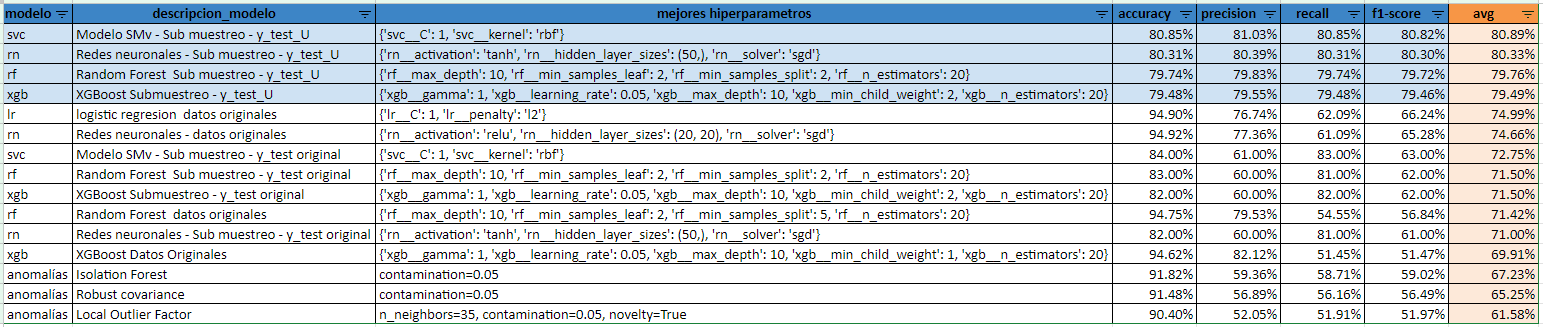

Establecimos una métrica que consiste en el promedio del accuracy, precision, recall y f1-score, y en base a ella armamos un ranking de los mejores modelos con los mejores hiperparámetros. De esta manera evidenciamos que el mejor modelo es el SVM entrenado con datos sub-muestreados.

Ahora bien, para este mejor modelo las métricas accuracy, precision, recall y f1-score fueron calculadas con los datos test también submuestreados (y_test_U), por lo que no se identifica igualdad de condiciones para comparar vs el resto de los modelos, por lo que hicimos la predicción con los datos test originales, teniendo otros resultados para los mismos modelos (los que tienen sub-fijo "submuestreo - y_test_originales").

Asumiendo de que no están en igualdad de condiciones, y revisando con los datos originales, el mejor modelo es la regresión logística.

# **2. Métricas de desempeño - modelos (Con reducción de la dimensionalidad)**

# **Reducción de dimensión**

## **2.1. Selección y diseño de modelos**
---

Probaremos diversos modelos de clasificiación debido a que tenemos una variable a predecir que es: una persona tendrá ataque cardiaco o no (HadHeartAttack)

### 2.1.1 modelo : LOGISTIC REGRESION


In [ ]:
grid_search_LogisticRegression = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=10)
grid_search_LogisticRegression.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search_LogisticRegression.best_params_)

# Predecir en el conjunto de prueba
y_pred = grid_search_LogisticRegression.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
Ligistic_regression_report=classification_report(y_test, y_pred)
print(Ligistic_regression_report)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Mejores hiperparámetros:
{'lr__C': 0.1, 'lr__penalty': 'l2'}
Informe de clasificación:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97     46513
         Yes       0.54      0.09      0.16      2692

    accuracy                           0.95     49205
   macro avg       0.74      0.54      0.57     49205
weighted avg       0.93      0.95      0.93     49205



### 2.1.2  modelo : SMV


In [ ]:
# Crear un objeto GridSearchCV
svm_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=3)

# Entrenar el modelo utilizando GridSearchCV
svm_search.fit(X_train_U, y_train_U)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(svm_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores hiperparámetros:
{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [ ]:
# Predecir en el conjunto de prueba
y_pred = svm_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
svm_report = classification_report(y_test, y_pred)
print(svm_report)


Informe de clasificación:
              precision    recall  f1-score   support

          No       0.99      0.77      0.86     46513
         Yes       0.17      0.82      0.28      2692

    accuracy                           0.77     49205
   macro avg       0.58      0.79      0.57     49205
weighted avg       0.94      0.77      0.83     49205



### 2.1.3: Modelo Random Forest

#### 2.1.3.1: Modelo Random Forest con los datos originales

In [ ]:
# Crear un objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=10)

# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
Random_forest_report = classification_report(y_test, y_pred)
print(Random_forest_report)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 10}
Informe de clasificación:
              precision    recall  f1-score   support

          No       0.95      1.00      0.97     46513
         Yes       0.64      0.00      0.01      2692

    accuracy                           0.95     49205
   macro avg       0.79      0.50      0.49     49205
weighted avg       0.93      0.95      0.92     49205



#### 2.1.3.2: Modelo Random Forest con sobremuestreo (Oversampling)

In [ ]:
# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train_O, y_train_O)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 20}


In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_O)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_O, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

          No       0.80      0.84      0.82     46455
         Yes       0.83      0.79      0.81     46580

    accuracy                           0.81     93035
   macro avg       0.81      0.81      0.81     93035
weighted avg       0.81      0.81      0.81     93035



#### 2.1.3.3: Modelo Random Forest con submuestreo (Undersampling)

In [ ]:
# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train_U, y_train_U)

# Se muestran los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros:
{'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 20}


In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

          No       0.99      0.75      0.85     46513
         Yes       0.16      0.85      0.27      2692

    accuracy                           0.75     49205
   macro avg       0.58      0.80      0.56     49205
weighted avg       0.94      0.75      0.82     49205



### 2.1.4: XGBoost

#### 2.1.4.1: XGBoost: Datos originales

In [ ]:
# Se muestran los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Mejores hiperparámetros:
{'xgb__gamma': 0, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 10, 'xgb__n_estimators': 20}


In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46513
           1       0.00      0.00      0.00      2692

    accuracy                           0.95     49205
   macro avg       0.47      0.50      0.49     49205
weighted avg       0.89      0.95      0.92     49205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2.1.4.2: XGboost con Sobremuestreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_O)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     46455
           1       0.84      0.81      0.83     46580

    accuracy                           0.83     93035
   macro avg       0.83      0.83      0.83     93035
weighted avg       0.83      0.83      0.83     93035



#### 2.1.4.3: XGboost submustreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)
y_test_binary = y_test.map({'No': 0, 'Yes': 1})

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     46513
           1       0.17      0.90      0.29      2692

    accuracy                           0.75     49205
   macro avg       0.58      0.82      0.57     49205
weighted avg       0.95      0.75      0.82     49205



### 2.1.5: Catboost

#### 2.1.5.1: Catboost datos originales

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46513
           1       0.00      0.00      0.00      2692

    accuracy                           0.95     49205
   macro avg       0.47      0.50      0.49     49205
weighted avg       0.89      0.95      0.92     49205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2.1.5.3: Catboost sobremuestreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_U)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81     46455
           1       0.83      0.77      0.80     46580

    accuracy                           0.80     93035
   macro avg       0.81      0.80      0.80     93035
weighted avg       0.81      0.80      0.80     93035



#### 2.1.5.3: Catboost submuestreo

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
print(classification_report(y_test_binary, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     46513
           1       0.15      0.77      0.26      2692

    accuracy                           0.75     49205
   macro avg       0.57      0.76      0.55     49205
weighted avg       0.94      0.75      0.82     49205



### 2.1.7: Redes neuronales

#### 2.1.7.1: Redes neuronales con los datos originales

In [ ]:
# Crear un objeto GridSearchCV
rn_grid_search = GridSearchCV(rn_pipeline, rn_param_grid, cv=3, n_jobs=-1, verbose=1)

# Entrenar el modelo utilizando GridSearchCV
rn_grid_search.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rn_grid_search.predict(X_test)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(rn_grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores hiperparámetros:
{'rn__activation': 'relu', 'rn__hidden_layer_sizes': (20, 20), 'rn__solver': 'sgd'}


#### 2.1.7.3: Redes neuronales con submuestreo (Undersampling)

In [ ]:
# Crear un objeto GridSearchCV
rn_grid_search = GridSearchCV(rn_pipeline, rn_param_grid, cv=3, n_jobs=-1, verbose=1)

# Entrenar el modelo utilizando GridSearchCV
rn_grid_search.fit(X_train_U, y_train_U)

# Predecir en el conjunto de prueba
y_pred = rn_grid_search.predict(X_test_U)

# Se muestran los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(rn_grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores hiperparámetros:
{'rn__activation': 'tanh', 'rn__hidden_layer_sizes': (50,), 'rn__solver': 'sgd'}


### 2.1.8: Detección de anomalías

#### 2.1.8.1: Robust covariance

In [ ]:
accuracy = accuracy_score(y_train.values, y_pred_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train.values, y_pred_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9030673163395438
precision: 0.5115436485168083
recall: 0.5106256846278413
f1_score: 0.5110115122278809


In [ ]:
y_pred_test = robust_covariance.predict(X_test)
y_pred_test_mapeado = np.array([mapeo[x] for x in y_pred_test], dtype=object)

accuracy = accuracy_score(y_test.values, y_pred_test_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.values, y_pred_test_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9030586322528198
precision: 0.5168638712030602
recall: 0.5158090698508644
f1_score: 0.51628572937872


#### 2.1.8.2: Isolation Forest

In [ ]:
accuracy = accuracy_score(y_train.values, y_pred_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train.values, y_pred_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9030673163395438
precision: 0.5115436485168083
recall: 0.5106256846278413
f1_score: 0.5110115122278809


In [ ]:
y_pred_test = isolation_forest.predict(X_test)
y_pred_test_mapeado = np.array([mapeo[x] for x in y_pred_test], dtype=object)

accuracy = accuracy_score(y_test.values, y_pred_test_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.values, y_pred_test_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9133421400264201
precision: 0.5671702791914515
recall: 0.5620201077210867
f1_score: 0.5644368453342757


#### 2.1.8.3: Local Outlier Factor

In [ ]:
accuracy = accuracy_score(y_train.values, y_pred_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train.values, y_pred_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.9030673163395438
precision: 0.5115436485168083
recall: 0.5106256846278413
f1_score: 0.5110115122278809


In [ ]:
y_pred_test = local_outlier_factor.predict(X_test)
y_pred_test_mapeado = np.array([mapeo[x] for x in y_pred_test], dtype=object)

accuracy = accuracy_score(y_test.values, y_pred_test_mapeado)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.values, y_pred_test_mapeado, average='macro')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

accuracy: 0.8984859262270094
precision: 0.4949036540462138
recall: 0.49519186490833583
f1_score: 0.4950255878431174


## **2.2. Entrenamiento del Modelo y Selección de Hiperparámetros y Evaluación del modelo - Con reducción de la dimensionalidad**
---

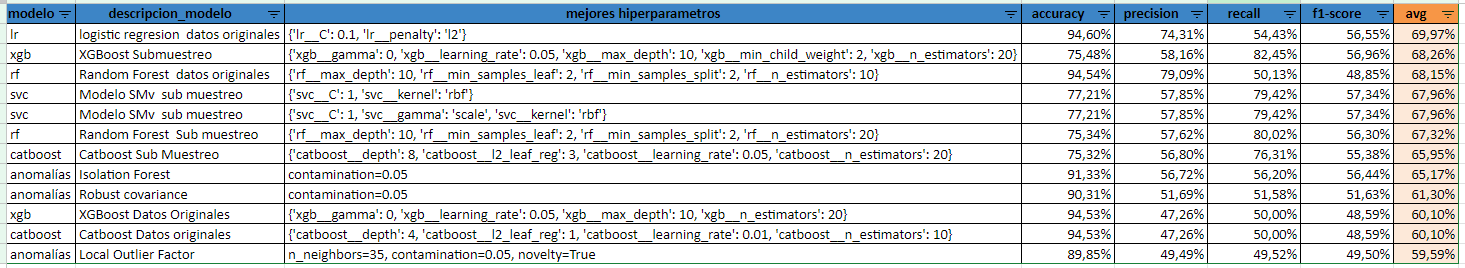

# **3. Aplicación del modelo y resultados**
---


Como el mejor modelo es la regresión logística, usamos "grid_search_LogisticRegression" para evaluación con los datos test

In [ ]:
# Predecir en el conjunto de prueba
y_pred = grid_search_LogisticRegression.predict(X_test)

# Mostrar métricas de evaluación
print("Informe de clasificación:")
Ligistic_regression_report=classification_report(y_test, y_pred)
print(Ligistic_regression_report)

Informe de clasificación:
              precision    recall  f1-score   support

          No       0.96      0.99      0.97     46513
         Yes       0.58      0.25      0.35      2692

    accuracy                           0.95     49205
   macro avg       0.77      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205



In [ ]:
def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))

  return df

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
class_names = ['No', 'Yes']
list_confusion_matrix(cnf_matrix,class_names)

Valor predicho     
                           No  Yes
Valor real No           46014  499
           Yes           2012  680

## **3.1. Conclusiones**
---

A pesar de que es el mejor modelo de los que probamos, en la práctica no es un buen modelo para predecir los verdaderos positivos ya que con la ayuda de la matriz de confusión evidenciamos que tenemos varios "Falsos-Negativos", por lo que para un trabajo posterior se proyecta explorar nuevas técnicas que permitan mejorar los modelos como: expandir el rango de hiperparámetros, probar con modelos alternativos, etc.